# COMP5318 - Machine Learning and Data Mining 

## SVM

#### 10 fold cross validation

### 1 Load data

In [1]:
import numpy as np
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

### 2 Standardization

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 3 SVM

#### 3.1 Define SVM function

In [6]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
def SVM_parallel(X_train,y_train,X_val,y_val):
    
    pca = PCA(0.9) # PCA retain 90% variance
    pca.fit(X_train) # train PCA
    
    X_train_PCA = pca.transform(X_train) # PCA transform for training data
    X_val_PCA = pca.transform(X_val) # PCA transform for teting data
    
    poly_svm = SVC(C= 1,kernel= 'poly') # define SVM parameters: degree 3 polynomial, C=1
    poly_svm.fit(X_train_PCA, y_train) # train SVM model

    return [y_val,poly_svm.predict(X_val_PCA)] # return [true label, predicted label]

#### 3.2 10-fold CV with parallel processing

In [7]:
%%time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=666) # split data into 10 pairs of training set and validation set
 
num_cores = multiprocessing.cpu_count() # count available CPU
     
# parallel processing for 10-fold CV with all CPU working in parallel
result = Parallel(n_jobs=num_cores)(delayed(SVM_parallel)(X_train[train],y_train[train],X_train[test],y_train[test] ) for train, test in kf.split(X_train))

# Wall time: 7min 40s

Wall time: 7min 40s


### 4 Evaluation

#### 4.1 Classification report

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

tmp=np.hstack(np.asarray(result)) # stack all results from parallel processing

print(classification_report(tmp[0], tmp[1]))
print(accuracy_score(tmp[0], tmp[1])) # 0.8947

#              precision    recall  f1-score   support

#           0       0.82      0.86      0.84      6000
#           1       0.98      0.98      0.98      6000
#           2       0.81      0.83      0.82      6000
#           3       0.90      0.90      0.90      6000
#           4       0.83      0.83      0.83      6000
#           5       0.97      0.96      0.97      6000
#           6       0.74      0.71      0.73      6000
#           7       0.94      0.95      0.95      6000
#           8       0.98      0.97      0.97      6000
#           9       0.96      0.96      0.96      6000

# avg / total       0.89      0.89      0.89     60000

             precision    recall  f1-score   support

          0       0.82      0.86      0.84      6000
          1       0.98      0.98      0.98      6000
          2       0.81      0.83      0.82      6000
          3       0.90      0.90      0.90      6000
          4       0.83      0.83      0.83      6000
          5       0.97      0.96      0.97      6000
          6       0.74      0.71      0.73      6000
          7       0.94      0.95      0.95      6000
          8       0.98      0.97      0.97      6000
          9       0.96      0.96      0.96      6000

avg / total       0.89      0.89      0.89     60000

0.8947


#### 4.2 Confusion matrix

In [108]:
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(tmp[0], tmp[1])
cm_dt

# array([[5135,   11,   94,  118,   14,    3,  587,    2,   36,    0],
#        [  12, 5888,    8,   68,    7,    0,   11,    0,    5,    1],
#        [ 122,    9, 4975,   58,  438,    2,  385,    0,   11,    0],
#        [ 167,   48,   56, 5422,  180,    0,  117,    0,   10,    0],
#        [  24,   10,  494,  169, 4984,    0,  309,    0,   10,    0],
#        [   1,    0,    2,    2,    0, 5773,    2,  126,   14,   80],
#        [ 732,   17,  472,  144,  328,    1, 4263,    0,   43,    0],
#        [   0,    0,    0,    0,    0,  107,    1, 5706,    4,  182],
#        [  39,    7,   39,   18,   20,   10,   52,   14, 5801,    0],
#        [   1,    0,    0,    0,    1,   53,    2,  206,    2, 5735]],
#       dtype=int64)

array([[5135,   11,   94,  118,   14,    3,  587,    2,   36,    0],
       [  12, 5888,    8,   68,    7,    0,   11,    0,    5,    1],
       [ 122,    9, 4975,   58,  438,    2,  385,    0,   11,    0],
       [ 167,   48,   56, 5422,  180,    0,  117,    0,   10,    0],
       [  24,   10,  494,  169, 4984,    0,  309,    0,   10,    0],
       [   1,    0,    2,    2,    0, 5773,    2,  126,   14,   80],
       [ 732,   17,  472,  144,  328,    1, 4263,    0,   43,    0],
       [   0,    0,    0,    0,    0,  107,    1, 5706,    4,  182],
       [  39,    7,   39,   18,   20,   10,   52,   14, 5801,    0],
       [   1,    0,    0,    0,    1,   53,    2,  206,    2, 5735]],
      dtype=int64)

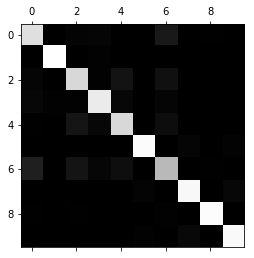

In [110]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm_dt, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter


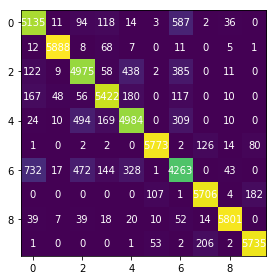

In [111]:
#another way to visulize
fig, ax = plt.subplots()
im = ax.imshow(cm_dt)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm_dt[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

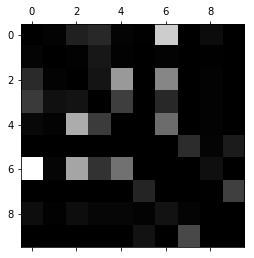

In [112]:
error_matrix = cm_dt / np.sum(cm_dt, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter